In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
TEST_CASE = 10
from gym_tetris.actions import MOVEMENT

In [35]:
level = []
action_heatmap = []
for test in range(2):
    df = pd.read_csv(f"./UNREAL-eval/{test}.csv")
    df["level"] = test + 10

    action_freq = np.array([
        [seq.count(str(action)) for action in range(12)] for seq in df["action sequence"]
    ])
    total_action_freq = action_freq.sum(axis=0)
    # df["action freq"] = total_action_freq.flatten()

    action_freq_df = pd.DataFrame([total_action_freq], columns=[' '.join(item) for item in MOVEMENT])
    action_freq_df["level"] = test + 10

    level.append(df)
    action_heatmap.append(action_freq_df)


level = pd.concat(level, ignore_index=True)
action_heatmap = pd.concat(action_heatmap, ignore_index=True)

In [36]:
level.head()

,rewards,blocks,episode length,survival time,action sequence,level
0,3.0,11,153,2.963557,"[6, 9, 6, 3, 3, 4, 3, 3, 9, 3, 5, 10, 5, 3, 3,...",10
1,2.0,17,272,4.913170,"[6, 0, 0, 6, 0, 6, 0, 3, 0, 6, 0, 6, 6, 3, 0, ...",10
2,3.0,14,230,5.357151,"[6, 6, 0, 6, 0, 3, 6, 3, 6, 3, 9, 0, 6, 3, 3, ...",10
3,10.0,15,255,4.656740,"[3, 3, 6, 3, 0, 3, 3, 3, 6, 6, 6, 6, 0, 6, 3, ...",10
4,7.0,21,331,6.197295,"[6, 6, 0, 6, 9, 6, 0, 6, 0, 6, 6, 9, 0, 6, 3, ...",10


In [37]:
action_heatmap.head()

,NOOP,A,B,right,right A,right B,left,left A,left B,down,down A,down B,level
0,161946,128579,75875,174014,8767,71066,213896,999,45977,170462,23577,28489,10
1,383015,335664,39963,137887,11498,23308,207003,1997,3062,39548,164794,19121,11


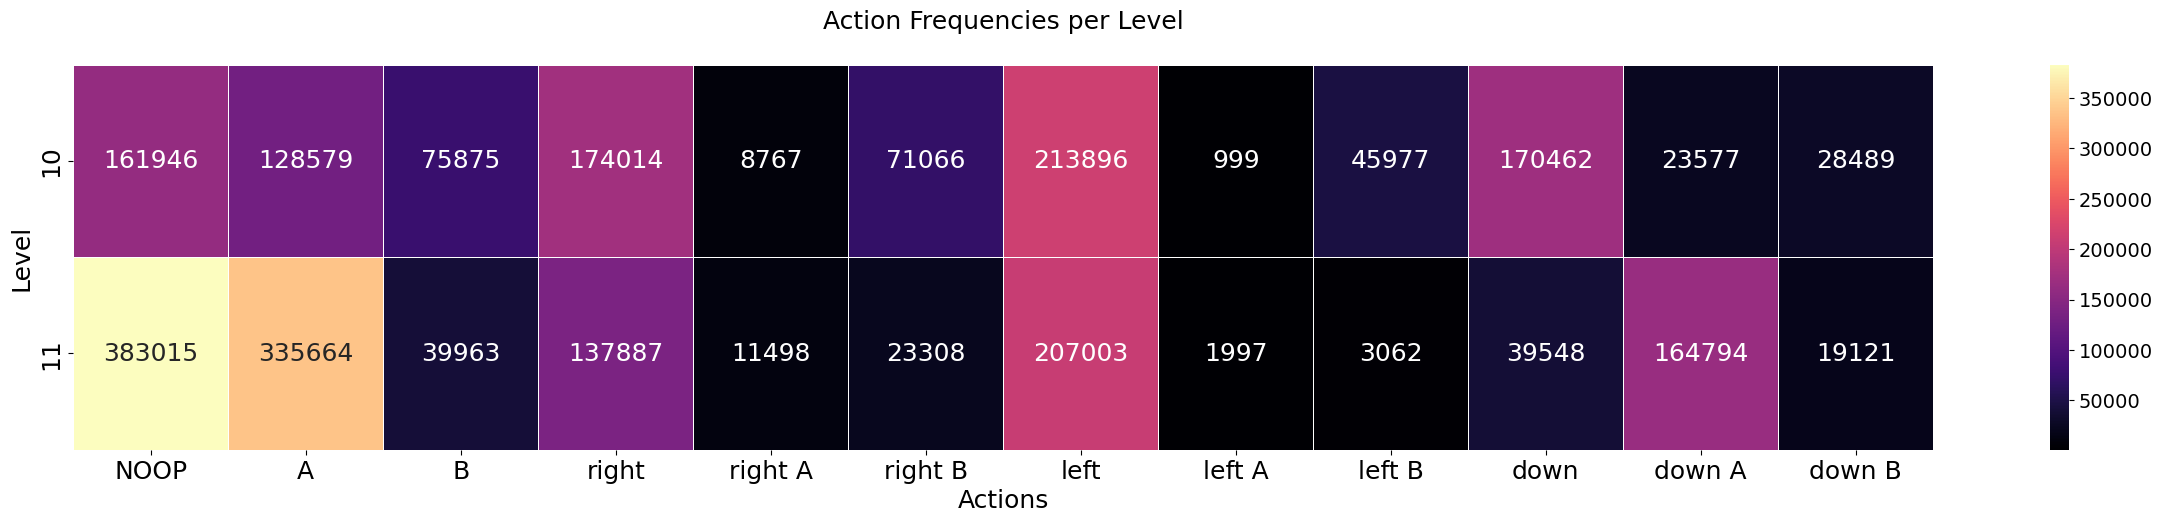

In [64]:
plt.figure(figsize=(30, 5))  # You can adjust the size
ax = sns.heatmap(action_heatmap.drop(columns=['level']), annot=True, cmap="magma", fmt='d', linewidths=0.5, yticklabels=action_heatmap["level"], annot_kws={"size": 18})

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)  # Ukuran font ticks colorbar

# Add labels and title
plt.title('Action Frequencies per Level\n', fontsize=18)
plt.xlabel('Actions', fontsize=18)
plt.ylabel('Level', fontsize=18)

# Show the heatmap
plt.show()

In [ ]:
summary_df = level.groupby("level").agg(
    avg_rewards=("rewards", "mean"),
    avg_blocks=("")
)